In [1]:
import csky as cy
import numpy as np
import matplotlib.pyplot as plt
import histlite as hl
from icecube import astro
import matplotlib as mpl
plt.rc('font', size=16)
'''plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})'''
plt.rcParams['axes.facecolor']='w'
plt.rcParams['savefig.facecolor']='w'
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

/home/ssclafani/.vens/py3_venv/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  from ipykernel import kernelapp as app


In [2]:
repo = cy.selections.Repository()

In [3]:
specs = cy.selections.PSDataSpecs.IC86v3_2017

In [4]:
ana = cy.get_analysis(repo, 'version-003-p02', specs)

Setting up Analysis for:
IC86v3_2017
Setting up IC86v3_2017...
Reading /data/ana/analyses/ps_tracks/version-003-p02/IC86_2012_MC.npy ...
Reading /data/ana/analyses/ps_tracks/version-003-p02/IC86_2017_exp.npy ...
Reading /data/ana/analyses/ps_tracks/version-003-p02/GRL/IC86_2017_exp.npy ...
Energy PDF Ratio Model...
  * gamma = 4.0000 ...
Signal Acceptance Model...
  * gamma = 4.0000 ...
Done.


In [5]:
a = ana.anas[0]

In [6]:
colors = {}
colors['PSTracks'] = 'grey'
colors['GFU'] = 'C0'
colors['NT'] = 'C1'

In [7]:
plt.rcParams['axes.facecolor']='w'
plt.rcParams['savefig.facecolor']='w'

In [8]:
def effa_plot(ax, ana, dec_deg_min = -90, dec_deg_max = 90, label = 'MISC', color = 'k', ls = '-'):
    a = ana.anas[-1]
    mask = (a.sig.dec < np.radians(dec_deg_max)) & (a.sig.dec > np.radians(dec_deg_min))
    
    dlogE=.1 #.1
    solid_angle=2*np.pi*(np.sin(np.radians(dec_deg_max))-np.sin(np.radians(dec_deg_min)))
    area= 1/ (1e4*np.log(10)) * (a.sig.oneweight[mask] / ( a.sig.true_energy[mask] *  solid_angle *  dlogE))
    if 'GRECO' in label:
        bins = np.arange(.5,6,dlogE)
    else:
        bins=np.arange(2,7.01,dlogE)
    h = hl.hist(np.log10(a.sig.true_energy[mask]), weights=area, bins=bins);
    hl.plot1d(h, histtype='step', linewidth=2, color=color, label=label, ls = ls)
    ax.semilogy()

    ax.grid()
    ax.legend(loc='lower right')
    ax.set_ylabel('$A_\mathsf{Eff}$($m^2$)')
    ax.set_xlabel('log$_{10}$(E) [GeV]')
    if 'GRECO' in label:
        ax.set_xlim(.5,6)
        ax.set_ylim((1e-8,1e2))
    else:
        ax.set_xlim((2,7))
        ax.set_ylim((1e-4,1e3))
    plt.tight_layout()
    return h

In [9]:
def event_rate(ana):
    a = ana.anas[-1]
    sig = a.sig
    event_rate = len(a.data.ra) / a.bg_livetime
    print('Event Rate {:.3} Hz'.format(event_rate))
    print('{:3f} Events / year'.format(len(a.data.ra) / a.bg_livetime * 86400 * 365))
    
    mask = a.data.dec > np.radians(-5)
    
    event_rate = len(a.data.ra[mask]) / a.bg_livetime
    print('Northern Event Rate {:.3} Hz'.format(event_rate))
    print('{:3f} Events / year'.format(len(a.data.ra[mask]) / a.bg_livetime * 86400 * 365))

    mask = a.data.dec < np.radians(-5)

    event_rate = len(a.data.ra[mask]) / a.bg_livetime
    print('Southern Event Rate {:.3} Hz'.format(event_rate))
    print('{:3f} Events / year'.format(len(a.data.ra[mask]) / a.bg_livetime * 86400 * 365))


In [10]:
def effa_plot_notlogged(ax, ana, dec_deg_min = -90, dec_deg_max = 90, label = 'MISC', color = 'k', ls = '-'):
    a = ana.anas[-1]
    mask = (a.sig.dec < np.radians(dec_deg_max)) & (a.sig.dec > np.radians(dec_deg_min))
    
    dlogE=.1 #.1
    bins = 10**np.arange(2,7,dlogE)
    solid_angle=2*np.pi*(np.sin(np.radians(dec_deg_max))-np.sin(np.radians(dec_deg_min)))
    area= 1/ (1e4*np.log(10)) * (a.sig.oneweight[mask] / ( a.sig.true_energy[mask] *  solid_angle *  dlogE))

    h = hl.hist((a.sig.true_energy[mask]), weights=area, bins=bins);
    hl.plot1d(h, histtype='step', linewidth=2, color=color, label=label, ls = ls, log=True)
    ax.loglog()

    ax.grid()
    ax.legend(loc='lower right')
    ax.set_ylabel('$A_\mathsf{Eff}$($m^2$)')
    ax.set_xlabel('log$_{10}$(E) [GeV]')

    ax.set_xlim((10**2,10**7))
    ax.set_ylim((1e-4,1e3))
    plt.tight_layout()
    return h

In [11]:
plot_dir = cy.utils.ensure_dir('/home/ssclafani/public_html/DNNC/paperplots/')


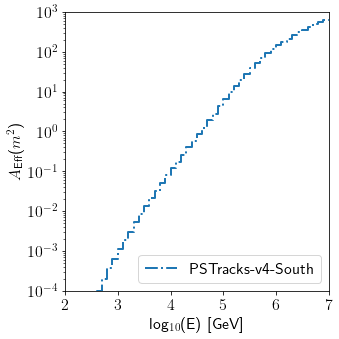

In [12]:
plt.rc ('font', size=16)
fig, ax1 = plt.subplots(1,1, figsize=(5,5))
label = 'PSTracks'
dec_deg_min = -5
dec_deg_max = 90
#ps_northern_hist = effa_plot(ax1, ana, dec_deg_min = dec_deg_min, dec_deg_max = dec_deg_max, label = 'PSTracks-v4-North', color = 'C0', ls='-')

dec_deg_min = -90
dec_deg_max = -5
ps_southern_hist = effa_plot(ax1,ana, dec_deg_min = dec_deg_min, dec_deg_max = dec_deg_max, label = 'PSTracks-v4-South', color = 'C0', ls = '-.')
plt.grid()



#cy.plotting.saving (plot_dir, 'effa_{}_{}_{}'.format(label, str(dec_deg_min).replace('-', 'm'), str(dec_deg_max).replace('-', 'm')))


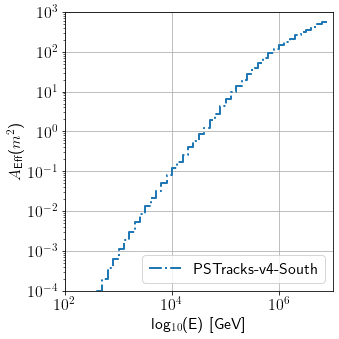

In [13]:
fig, ax1 = plt.subplots(1,1, figsize=(5,5))
ps_southern_hist = effa_plot_notlogged(ax1,ana, dec_deg_min = dec_deg_min, 
                                       dec_deg_max = dec_deg_max, label = 'PSTracks-v4-South', color = 'C0', ls = '-.')


In [14]:
dndenorm = 1.66
dndegamma = 2.53

[]

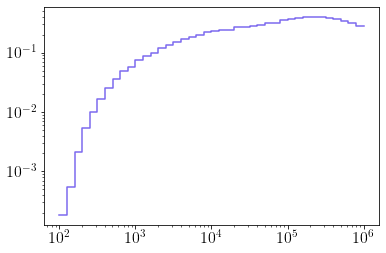

In [15]:
fig, ax = plt.subplots()
dlogE = .1
bins=10**np.arange(2,6.01,dlogE)
dec_deg_max = -5
dec_deg_min = -90
mask = (a.sig.dec < np.radians(dec_deg_max)) & (a.sig.dec > np.radians(dec_deg_min))

h_dNdE_tracks = hl.hist((a.sig[mask].true_energy), 
                        365*86400*dndenorm*1e-18*a.sig[mask].oneweight*(a.sig[mask].true_energy/1e5)**-dndegamma, 
                        bins=bins)
tot_tracks = sum(365*86400*dndenorm*1e-18*a.sig[mask].oneweight*(a.sig[mask].true_energy/1e5)**-dndegamma)
hl.plot1d(ax, h_dNdE_tracks, label = r'tracks_expected events', color = 'mediumslateblue')
plt.loglog()

In [16]:
specs = cy.selections.MESEDataSpecs.mesc_7yr
ana = cy.get_analysis(repo, 'version-001-p02', specs)

Setting up Analysis for:
MESC_2010_2016
Setting up MESC_2010_2016...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2013_MC.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC79_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2011_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2012_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2013_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2014_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2015_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/IC86_2016_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC79_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC86_2011_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/IC86_2012_exp.npy ...
Reading /data/ana/analyses/mese_cascades/version-001-p02/GRL/

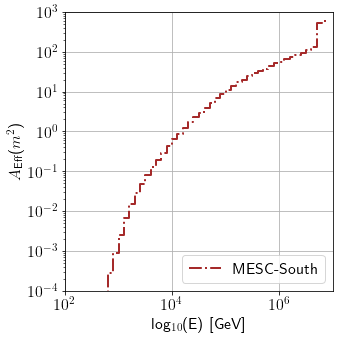

In [17]:
plt.rc ('font', size=16)
fig, ax1 = plt.subplots(1,1, figsize=(5,5))
label = 'MESC'
dec_deg_min = -5
dec_deg_max = 90
#mese_northern_hist = effa_plot(ax1, ana, dec_deg_min = dec_deg_min, 
#                               dec_deg_max = dec_deg_max, label = 'MESC-North', color = 'brown', ls='-')

dec_deg_min = -90
dec_deg_max = -5
mese_southern_hist = effa_plot_notlogged(ax1,ana, dec_deg_min = dec_deg_min, 
                               dec_deg_max = dec_deg_max, label = 'MESC-South', color = 'brown', ls = '-.')




#plot_dir = cy.utils.ensure_dir('/home/ssclafani/public_html/TechLead/DataSet_Plots/{}'.format(label))
#cy.plotting.saving (plot_dir, 'effa_{}_{}_{}'.format(label, str(dec_deg_min).replace('-', 'm'), str(dec_deg_max).replace('-', 'm')))


In [18]:
a = ana.anas[-1]

[]

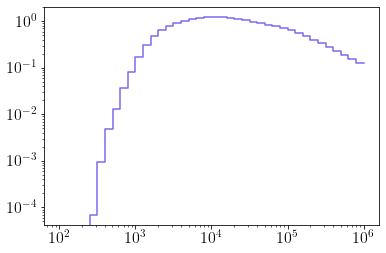

In [19]:
fig, ax = plt.subplots()
bins=10**np.arange(2,6.01,dlogE)

dec_deg_max = -5
dec_deg_min = -90
mask = (a.sig.dec < np.radians(dec_deg_max)) & (a.sig.dec > np.radians(dec_deg_min))
h_dNdE_mese = hl.hist((a.sig[mask].true_energy), 
                      365*86400*dndenorm*1e-18*a.sig[mask].oneweight*(a.sig[mask].true_energy/1e5)**-dndegamma, 
                      bins=bins)
tot_mese = sum(365*86400*dndenorm*1e-18*a.sig[mask].oneweight*(a.sig[mask].true_energy/1e5)**-dndegamma)
hl.plot1d(ax, h_dNdE_mese, label = r'mese_expected events', color = 'mediumslateblue')
plt.loglog()

In [20]:
repo = (cy.selections.Repository(local_root='/data/user/ssclafani/data/analyses'))

In [21]:
#specs = [Cascades]
specs = cy.selections.DNNCascadeDataSpecs.DNNC_10yr
ana = cy.get_analysis (repo, 'version-001-p00', specs)

Setting up Analysis for:
DNNCascade_10yr
Setting up DNNCascade_10yr...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p00/MC_NuGen_bfrv1_2153x.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p00/IC86_2011_exp.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p00/IC86_2012_exp.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p00/IC86_2013_exp.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p00/IC86_2014_exp.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p00/IC86_2015_exp.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p00/IC86_2016_exp.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p00/IC86_2017_exp.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p00/IC86_2018_exp.npy ...
Reading /data/user/ssclafani/data/analyses/dnn_cascades/version-001-p00/IC86

In [22]:
a = ana.anas[-1]
mask = (a.data.log10energy > 5) & (a.data.dec > np.radians(-5))
sum(mask)

54

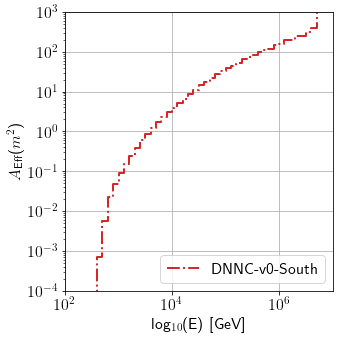

In [23]:
plt.rc ('font', size=16)
fig, ax1 = plt.subplots(1,1, figsize=(5,5))
label = 'DNNCascade'
#dec_deg_min = -5
#dec_deg_max = 90
#DNNC_northern_hist = effa_plot(ax1, ana, dec_deg_min = dec_deg_min, dec_deg_max = dec_deg_max, label = 'DNNC-v0-North', color = 'C3', ls='-')

dec_deg_min = -90
dec_deg_max = -5
DNNC_southern_hist = effa_plot_notlogged(ax1,ana, dec_deg_min = dec_deg_min, dec_deg_max = dec_deg_max, label = 'DNNC-v0-South', color = 'C3', ls = '-.')




#plot_dir = cy.utils.ensure_dir('/home/ssclafani/public_html/TechLead/DataSet_Plots/{}'.format(label))
#cy.plotting.saving (plot_dir, 'effa_{}_{}_{}'.format(label, str(dec_deg_min).replace('-', 'm'), str(dec_deg_max).replace('-', 'm')))


[]

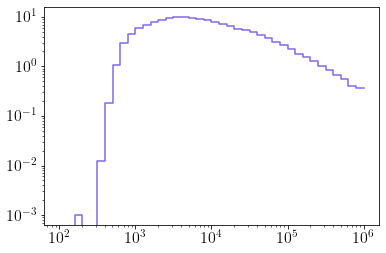

In [24]:
fig, ax = plt.subplots()
bins=10**np.arange(2,6.01,dlogE)
dec_deg_max = -5
dec_deg_min = -90
mask = (a.sig.dec < np.radians(dec_deg_max)) & (a.sig.dec > np.radians(dec_deg_min))
h_dNdE_dnnc = hl.hist((a.sig[mask].true_energy), 
                      365*86400*dndenorm*1e-18*a.sig[mask].oneweight*(a.sig[mask].true_energy/1e5)**-dndegamma, 
                      bins=bins)
tot_dnnc =sum(365*86400*dndenorm*1e-18*a.sig[mask].oneweight*(a.sig[mask].true_energy/1e5)**-dndegamma)
hl.plot1d(ax, h_dNdE_dnnc, label = r'dnnc_expected events', color = 'mediumslateblue')
plt.loglog()

In [25]:
soft_colors = cy.plotting.soft_colors

Text(0, 0.5, 'Expected Events per year (E$^{-3}$)')

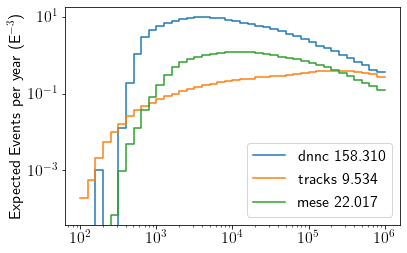

In [26]:
fig, ax = plt.subplots()
hl.plot1d(ax, h_dNdE_dnnc, label = r'dnnc {:.3f}'.format(tot_dnnc), color = 'C0')
hl.plot1d(ax, h_dNdE_tracks, label = r'tracks {:.3f}'.format(tot_tracks), color = 'C1')
hl.plot1d(ax, h_dNdE_mese, label = r'mese {:.3f}'.format(tot_mese), color = 'C2')
plt.loglog()
plt.legend()
plt.ylabel('Expected Events per year (E$^{-3}$)')
#plt.xlim(3,7)

In [27]:
import seaborn as sns

In [28]:
colors = sns.color_palette('bright', n_colors=10)

In [29]:
colors = ['#0B3D53', '#FF7F0E',  '#5C9FC9']

In [30]:
h_dNdE_dnnc.integrate().values

array(1119118.13037048)

-> /home/ssclafani/public_html/DNNC/paperplots//effa_ps_tracks_cascades_bothaxis


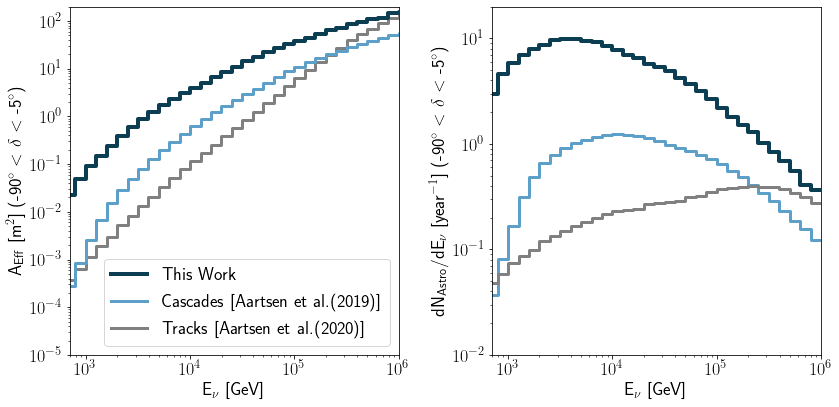

In [58]:
plt.rc('font', size=18)
label = 'ps_tracks_cascades'
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,6))


hl.plot1d(ax1, ps_southern_hist, label=r'Tracks [\textsf{Aartsen et al.(2020)}]', 
          color = 'grey', lw=3, ls='-', zorder=-1)
hl.plot1d(ax1, mese_southern_hist, label=r' Cascades [\textsf{Aartsen et al.(2019)}]', 
          color = colors[2], lw=3, ls='-', zorder=-1)
hl.plot1d(ax1, DNNC_southern_hist, label=r'\textsf{This Work}', color = colors[0], lw=4,ls='-')

hl.plot1d(ax2, h_dNdE_dnnc, lw=4, label = r'n$_{{signal}}$: {:.1f}'.format(tot_dnnc), color = colors[0])
hl.plot1d(ax2, h_dNdE_mese,lw=3,  label = r'n$_{{signal}}$: {:.1f}'.format(tot_mese), color = colors[2])
hl.plot1d(ax2, h_dNdE_tracks, lw=3, label = r'n$_{{signal}}$: {:.1f}'.format(tot_tracks), color = 'grey')


ax2.loglog()
ax2.set_ylabel(r'$\frac{\textsf{dN}_\textsf{Astro}}{\textsf{dE}_\nu}$ [year$^{-1}$]')
ax2.set_ylabel(r'$\textsf{dN}_\textsf{Astro} / \textsf{dE}_\nu$ [year$^{-1}$] (-90$^\circ$ $<$ $\delta$ $<$ -5$^\circ$)')

ax2.set_ylim(1e-2,20)
ax2.set_yticks([1e-2, 1e-1, 1,10])
#fig.suptitle('-90$^\circ$ $<$ $\delta$ $<$ -5$^\circ$')

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1])#, loc='lower right')

ax1.set_ylabel('A$_\mathsf{Eff}$ [m$^2$] (-90$^\circ$ $<$ $\delta$ $<$ -5$^\circ$)')
ax2.set_xlabel(r'E$_\nu$ [GeV]')
ax1.set_xlabel(r'E$_\nu$ [GeV]')


ax1.loglog()
ax1.set_xlim(700, 1e6)
ax2.set_xlim(700, 1e6)

ax1.set_ylim(1e-5,2e2)
#ax1.set_yticks('both')
#ax1.text(1.8, 700, 'IceCube Preliminary', c='r')
plt.tight_layout()
#plot_dir = cy.utils.ensure_dir('/home/ssclafani/public_html/TechLead/DataSet_Plots/{}'.format(label))
cy.plotting.saving (plot_dir, 'effa_{}_bothaxis'.format(label))

-> /home/ssclafani/public_html/DNNC/paperplots//effa_ps_tracks_cascades_South


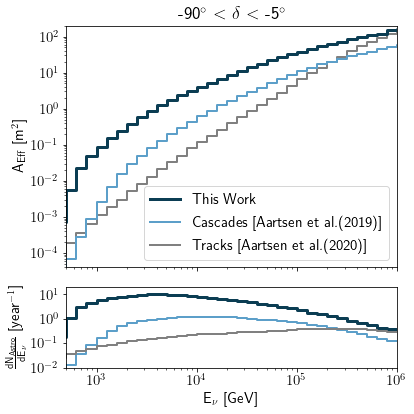

In [56]:
plt.rc('font', size=15)
label = 'ps_tracks_cascades'
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (6,6), 
                               gridspec_kw = {'height_ratios':[3, 1]}, sharex=True)


hl.plot1d(ax1, ps_southern_hist, label=r'Tracks [\textsf{Aartsen et al.(2020)}]', 
          color = 'grey', lw=2, ls='-', zorder=-1)
hl.plot1d(ax1, mese_southern_hist, label=r' Cascades [\textsf{Aartsen et al.(2019)}]', 
          color = colors[2], lw=2, ls='-', zorder=-1)
hl.plot1d(ax1, DNNC_southern_hist, label=r'\textsf{This Work}', color = colors[0], lw=3,ls='-')



#hl.plot1d(ax2, DNNC_southern_hist /ps_southern_hist, color = 'grey', 
#          lw=2, ls='-', log=True)
#hl.plot1d(ax2, DNNC_southern_hist / mese_southern_hist    , 
#          color = colors[2], ls='-', lw=2, log=True)

#dnnc_N = h_dNdE_dnnc.integrate().values
#tracks_N = h_dNdE_tracks.integrate().values
#mese_N = h_dNdE_mese.integrate().values

hl.plot1d(ax2, h_dNdE_dnnc, lw=3, label = r'n$_{{signal}}$: {:.1f}'.format(tot_dnnc), color = colors[0])
hl.plot1d(ax2, h_dNdE_mese,lw=2,  label = r'n$_{{signal}}$: {:.1f}'.format(tot_mese), color = colors[2])
hl.plot1d(ax2, h_dNdE_tracks, lw=2, label = r'n$_{{signal}}$: {:.1f}'.format(tot_tracks), color = 'grey')


#ax2.axhline(1,lw =3, color=colors[0])
ax2.semilogy()
#ax2.set_ylabel(r'dN$_\textsf{Astro}$/dE [year$^{-1}$]')
ax2.set_ylabel(r'$\frac{\textsf{dN}_\textsf{Astro}}{\textsf{dE}_\nu}$ [year$^{-1}$]')
ax2.set_ylim(1e-2,20)
ax2.set_yticks([1e-2, 1e-1, 1,10])
#ax2.legend()
#ax2.set_ylim(1,500)
#ax2.set_yticks([1,10,100])

#ax2.set_ylabel(r'$\frac{\textsf{This Work}}{\textsf{Other}}$')
ax1.set_title('-90$^\circ$ $<$ $\delta$ $<$ -5$^\circ$')

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1])#, loc='lower right')

#ax1.legend(loc='lower right', ncol = 1,)
ax1.set_ylabel('A$_\mathsf{Eff}$ [m$^2$]')
ax2.set_xlabel(r'E$_\nu$ [GeV]')


ax1.loglog()
ax1.set_xlim(500, 1e6)

ax1.set_ylim(.4e-4,2e2)
#ax1.set_yticks('both')
#ax1.text(1.8, 700, 'IceCube Preliminary', c='r')
plt.tight_layout()
#plot_dir = cy.utils.ensure_dir('/home/ssclafani/public_html/TechLead/DataSet_Plots/{}'.format(label))
cy.plotting.saving (plot_dir, 'effa_{}_South'.format(label))